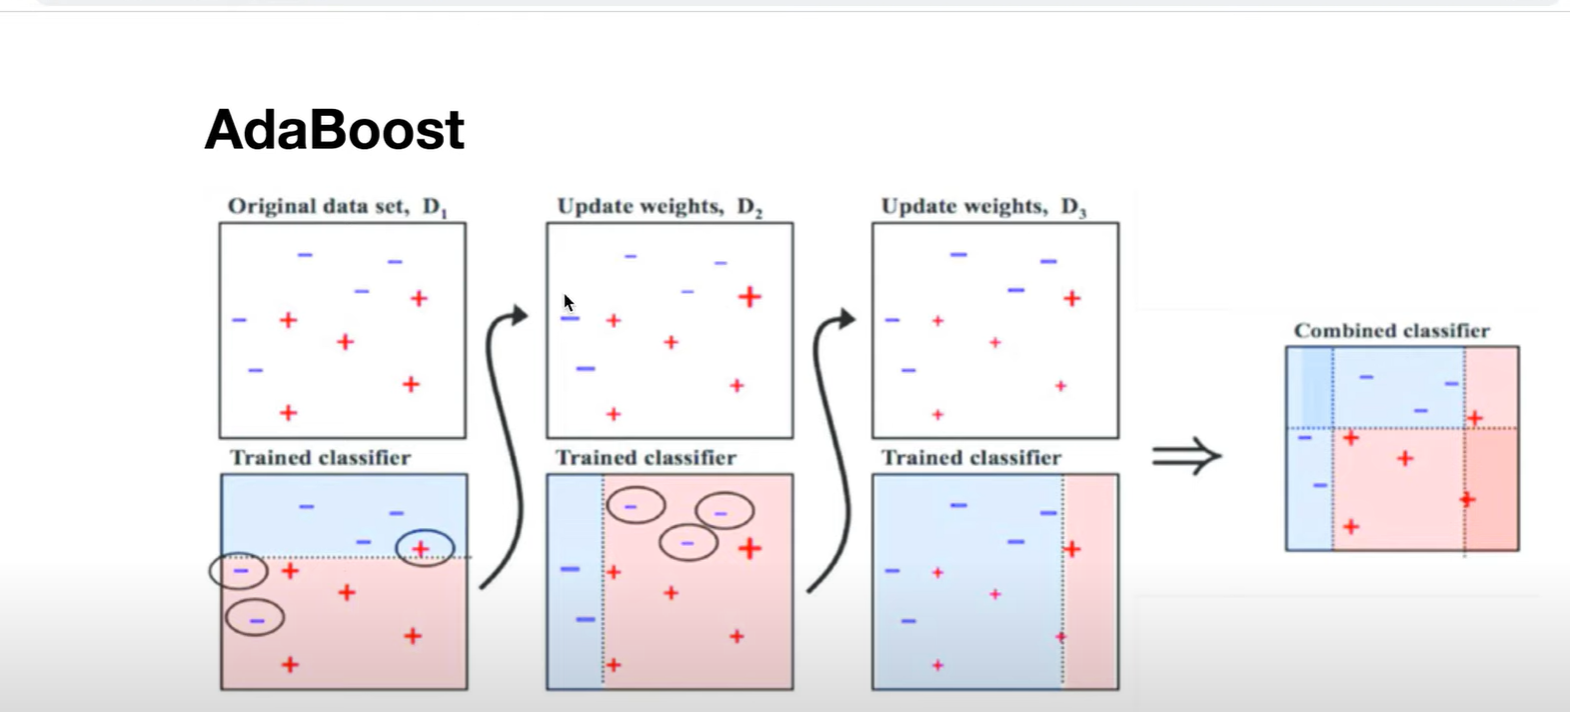

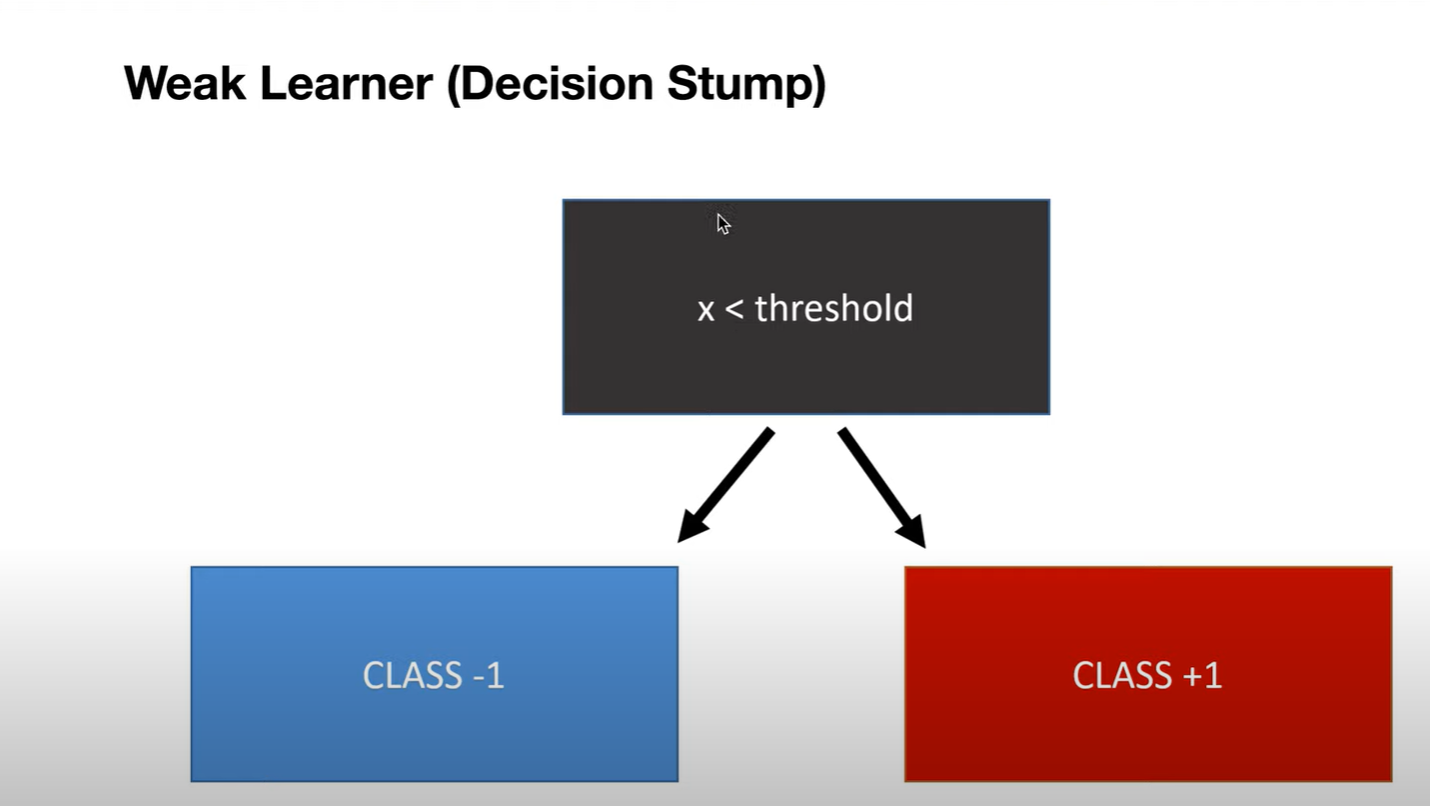

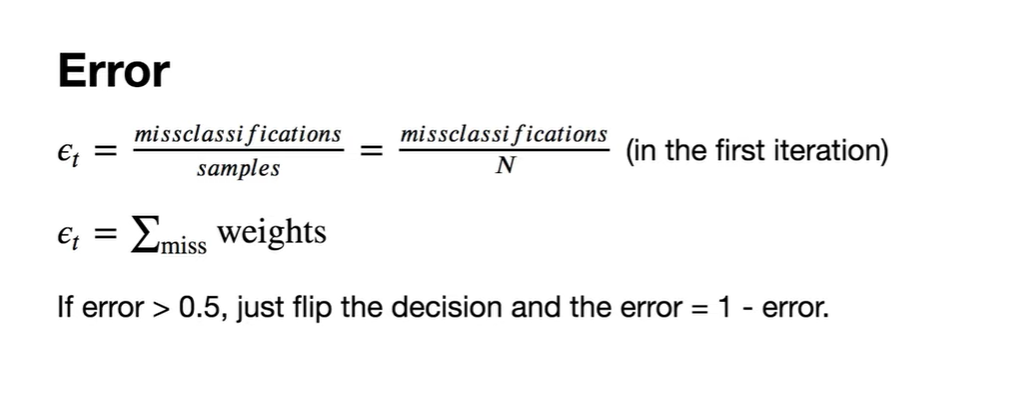

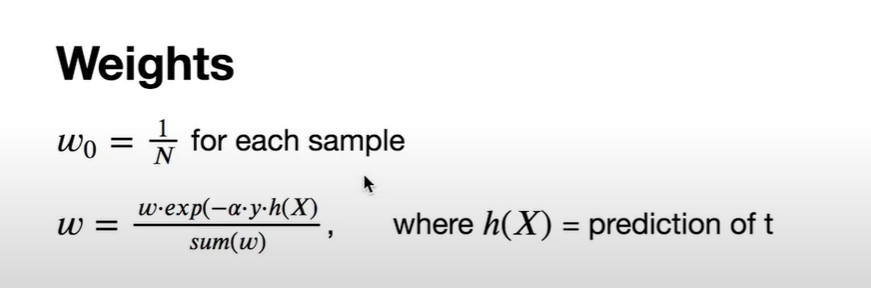
we start with w0 weights, then update it using the formula

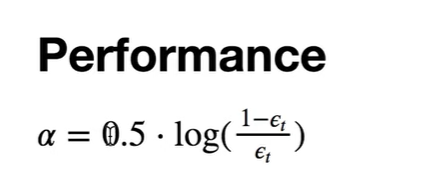 it is error(et)

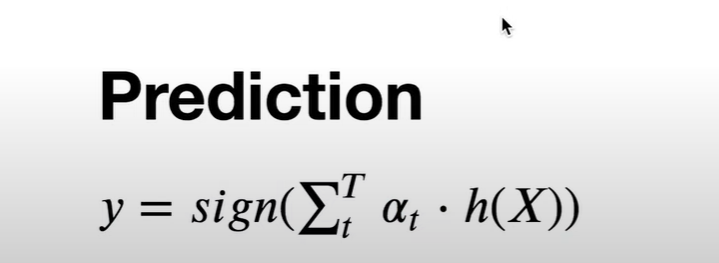

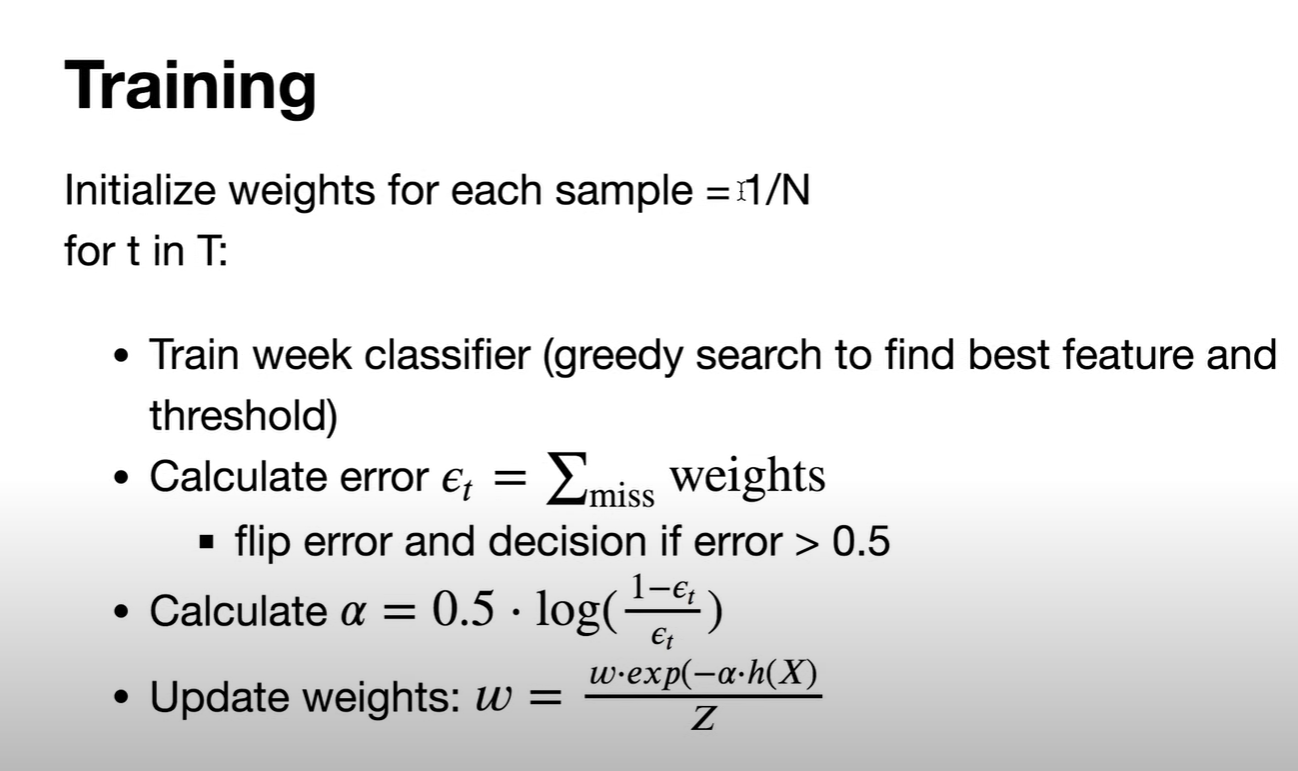

In [1]:
import numpy as np

In [2]:
class DecisionStump:
    def __init__(self):
        # this tell us whether the sample should be classified
        # as -1 or +1 for the given threshold
        self.polarity = 1
        self.feature_idx = None
        self.threshold = None
        self.alpha = None
    
    def predict(self,X):
        n_samples = X.shape[0]
        X_c = X[:,self.feature_idx]
        
        preds = np.ones(n_samples)
        if self.polarity == 1:
            preds[X_c < self.threshold] = -1
        else:
            preds[X_c > self.threshold] = -1
        
        return preds
        

In [15]:
class Adaboost:
    def __init__(self, n_classifiers):
        self.n_clf = n_classifiers
        
    def fit(self,X,y):
        n_samples,n_features = X.shape
        
        #init sample weights. basically it sets 1/n_samples for the n_samples elements
        w = np.full(n_samples,1/n_samples)
        
        #list to store all classifiers
        self.clfs = []
        
        for _ in range(self.n_clf):
            clf = DecisionStump()
            
            #find best feature and best threshold
            min_error = float('inf')
            
            for feature_i in range(n_features):
                X_c = X[:,feature_i]
                threshold = np.unique(X_c)
                
                for thr in threshold:
                    polarity = 1
                    preds = np.ones(n_samples)
                    preds[X_c < thr] = -1
                    
                    #calc error
                    misclassified = w[y != preds]
                    error = sum(misclassified)
                    
                    if error > 0.5:
                        error = 1 - error
                        polarity = -1
                    
                    if error < min_error:
                        min_error = error
                        clf.polarity = polarity
                        clf.threshold = thr
                        clf.feature_idx = feature_i 
                        
            EPS = 1e-10
            #performance
            clf.alpha = 0.5 * np.log((1-min_error + EPS) / (min_error+EPS))
            #updating sample weights
            predictions = clf.predict(X)
            
            w *= np.exp(-clf.alpha * y * predictions)
            w /= np.sum(w)
            
            self.clfs.append(clf)
        
    def predict(self,X):
        clf_preds = [clf.alpha * clf.predict(X) for clf in self.clfs]
        y_preds = np.sum(clf_preds,axis=0)
        y_preds = np.sign(y_preds)
        return y_preds

In [16]:
import sklearn
from sklearn import datasets

bc = datasets.load_breast_cancer()

X,y = bc.data,bc.target

y[y==0] = -1


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [17]:
clf = Adaboost(10)
clf.fit(X_train,y_train)
preds = clf.predict(X_test)

In [18]:
acc = np.sum(preds == y_test) /len(y_test) 
acc

0.986013986013986